# Placement Prediction

### Key Steps for an End-to-End Machine Learning Workflow

- **Data Preprocessing**, **Exploratory Data Analysis (EDA)**, and **Feature Selection** to prepare and understand the data.
- Extract **input features** and **target labels** from the preprocessed dataset.
- Apply **feature scaling** to standardize the values for better model performance.
- Split the data into **training** and **testing** sets for model evaluation.
- **Train** the selected model using the training data.
- **Evaluate** the trained model's performance and, if necessary, perform model selection.
- **Deploy** the finalized model for real-world use.

### Note
This project utilizes **Logistic Regression** for the model prediction.

In [1]:
import pickle
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from io import StringIO

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

In [2]:
# Opening a local .csv file
# df = pd.read_csv('placement.csv')

# Opening a .csv file from an URL
url = "https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}

req = requests.get(url, headers=headers)
data = StringIO(req.text)

df = pd.read_csv(data)

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

### Data Preprocessing

In [6]:
df = df.iloc[:, 1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### Exploratory Data Analysis

Text(0.5, 1.0, 'Placement Visualization\n(CGPA vs IQ)')

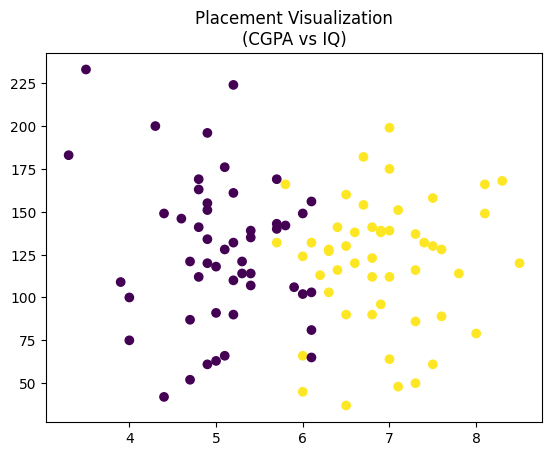

In [8]:
# Create a scatter plot to visualize the relationship between 'cgpa' (x-axis) and 'iq' (y-axis)
# The 'c' parameter is used to color the points based on the 'placement' column in the DataFrame

plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

plt.title('Placement Visualization\n(CGPA vs IQ)')

### Extracting Input Features & Target Labels

In [9]:
# Input columns (Independent Variables)
# 2D Tensor (Matrix)
x = df.iloc[:, 0:2]

# Output column (Dependent Variable)
# 1D Tensor (Vector)
y = df.iloc[:, -1]

In [10]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

### Data Splitting into Training and Testing Sets

In [12]:
# Split the data into training and testing sets
# x_train and y_train will contain 90% of the data, while x_test and y_test will contain 10%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [13]:
x_test

,cgpa,iq
90,7.3,86.0
4,5.8,142.0
87,5.7,132.0
99,6.2,113.0
8,6.1,156.0
81,5.4,107.0
74,6.7,154.0
44,7.5,61.0
9,5.1,66.0
56,6.1,65.0


### Feature Scaling to Standardize the Values

In [14]:
# Initialize the StandardScaler for feature scaling

scaler = StandardScaler()

In [15]:
# Standardize the training data using the previously initialized scaler

x_train = scaler.fit_transform(x_train)

In [16]:
x_train

array([[ 0.02654636, -1.48819479],
       [-0.82672934, -1.56349701],
       [ 0.11187392, -0.55946753],
       [ 0.02654636,  0.59516636],
       [ 1.56244261, -0.28335943],
       [-0.14410878,  1.02187888],
       [-0.22943635,  0.44456194],
       [ 0.70916691, -0.88577711],
       [-0.91205691,  0.64536783],
       [ 0.4531842 ,  0.87127446],
       [ 1.39178747, -0.91087785],
       [ 0.36785663,  0.39436046],
       [ 0.87982205,  1.24778552],
       [-1.76533261, -0.40886311],
       [ 1.13580476, -1.88980658],
       [ 0.96514962,  0.64536783],
       [ 0.79449448,  0.34415899],
       [-0.99738448,  0.94657667],
       [ 0.28252906,  0.06805089],
       [-1.42402233,  1.87530394],
       [ 0.36785663, -0.23315796],
       [ 1.98908046,  1.07208036],
       [ 0.70916691,  0.39436046],
       [ 0.4531842 , -0.88577711],
       [ 1.3064599 ,  0.82107299],
       [ 0.02654636, -0.58456827],
       [ 1.73309775, -1.16188522],
       [-0.99738448,  1.09718109],
       [ 0.02654636,

In [17]:
# Transform the test data using the previously learned scaling parameters

x_test = scaler.transform(x_test)

In [18]:
x_test

array([[ 1.13580476, -0.98618006],
       [-0.14410878,  0.4194612 ],
       [-0.22943635,  0.16845383],
       [ 0.19720149, -0.30846017],
       [ 0.11187392,  0.77087152],
       [-0.48541906, -0.45906459],
       [ 0.62383934,  0.72067004],
       [ 1.3064599 , -1.61369848],
       [-0.74140177, -1.48819479],
       [ 0.11187392, -1.51329553]])

### Training the Selected Model

In [19]:
# Initialize a Logistic Regression classifier

clf = LogisticRegression()

In [20]:
# Train the Logistic Regression model using the training data

clf.fit(x_train, y_train)

LogisticRegression()

In [21]:
# Use the trained Logistic Regression model to make predictions on the test data

y_pred = clf.predict(x_test)

In [22]:
y_test

90    1
4     0
87    1
99    1
8     0
81    0
74    1
44    1
9     0
56    0
Name: placement, dtype: int64

### Evaluating the Trained Model's Performance

In [23]:
# Calculate the accuracy of the Logistic Regression model's predictions on the test data

accuracy = accuracy_score(y_test, y_pred)

In [24]:
accuracy

0.7

### Ploting Decision Regions

<AxesSubplot: >

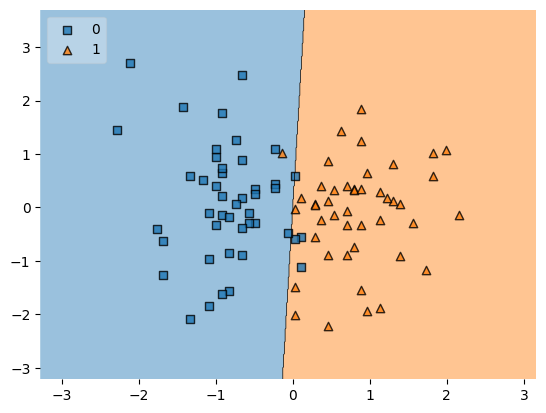

In [25]:
# Plot decision regions of the trained Logistic Regression model on the training data

plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

### Saving Model

In [26]:
# Save the trained Logistic Regression model to a file using pickle

pickle.dump(clf, open('model.pkl', 'wb'))